In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [2]:
# pandas
import pandas as pd
def df2np(df, model):
    df = df.loc[df['Model'] == model, 'SSIM']
    return df.to_numpy().T


# Load Brain results
brain_df = pd.read_excel('./data/Brain_results.xlsx')

brain_unt_008M = df2np(brain_df, 'U-Net-8M')[-1]
brain_unt_031M = df2np(brain_df, 'U-Net-31M')[-1]
brain_unt_124M = df2np(brain_df, 'U-Net-124M')[-1]

brain_vit_008M = df2np(brain_df, 'ViT-8M/10')[-1]
brain_vit_032M = df2np(brain_df, 'ViT-32M/10')[-1]
brain_vit_060M = df2np(brain_df, 'ViT-60M/10')[-1]

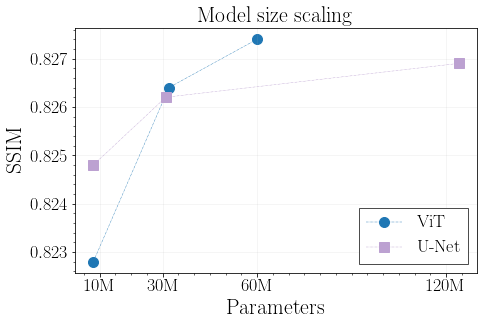

In [3]:
w, h = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots()

""" Model styles """
vits = ViT('s', useline=True)
vitm = ViT('m', useline=False)
vitl = ViT('l', useline=False)

unts = Unet('s', useline=True)
untm = Unet('m', useline=False)
untl = Unet('l', useline=False)

""" Plot Brain """
# ax.plot(60, brain_vit_060M, vitl.marker, markersize=vitl.ms, color=vitl.color, zorder=4)
# ax.plot(32, brain_vit_032M, vitm.marker, markersize=vitm.ms, color=vitm.color, zorder=2)
# ax.plot(8, brain_vit_008M, vits.marker, markersize=vits.ms,  color=vits.color, zorder=2)
# ax.plot(124, brain_unt_124M, untl.marker, markersize=untl.ms, color=untl.color, zorder=3)
# ax.plot(31, brain_unt_031M, untm.marker, markersize=untm.ms, color=untm.color, zorder=1)
# ax.plot(8, brain_unt_008M, unts.marker, markersize=unts.ms,  color=unts.color, zorder=1)
ax.plot([8, 32, 60], [brain_vit_008M, brain_vit_032M, brain_vit_060M], vits.marker, markersize=vitm.ms, color=vitl.color, label='ViT', zorder=1)
ax.plot([8, 31, 124], [brain_unt_008M, brain_unt_031M, brain_unt_124M], unts.marker, markersize=untm.ms, color=untl.color, label='U-Net', zorder=3)
# ax.fill_between(brain_train_data, brain_unt_124M, brain_unt_008M, alpha=0.1, color=untl.color)
# ax.fill_between(brain_train_data, brain_vit_060M, brain_vit_008M, alpha=0.1, color=vitl.color)
ax.set_title('Model size scaling')
ax.set_xticks([10, 30, 60, 120])
ax.set_xticklabels(['10M', '30M', '60M', '120M'])
# ax.tick_params(axis='x', which='minor', bottom=False)
# ax.yaxis.set_ticks(np.arange(0.805, 0.83, 0.005))
ax.legend()

# Labels
ax.set_xlabel('Parameters', y=-0.02)
ax.set_ylabel('SSIM', x=0.055)

## Save
fig.savefig('./plots/parameter_scaling.pdf', format="pdf", bbox_inches = 'tight')